In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [284]:
df = pd.read_excel('E:/Dropbox/Dropbox/covid_19_data.xlsx', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3992 entries, 0 to 3991
Data columns (total 8 columns):
SNo                3992 non-null int64
ObservationDate    3992 non-null datetime64[ns]
Province/State     2594 non-null object
Country/Region     3992 non-null object
Last Update        3992 non-null datetime64[ns]
Confirmed          3992 non-null int64
Deaths             3992 non-null int64
Recovered          3992 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 249.6+ KB


In [285]:
d = '2020-03-02'
agg_df = df[df['ObservationDate'] == d]
agg_df = agg_df.drop(columns = ['ObservationDate', 'SNo']).set_index('Country/Region')
agg_df = agg_df.sum(level = 'Country/Region')

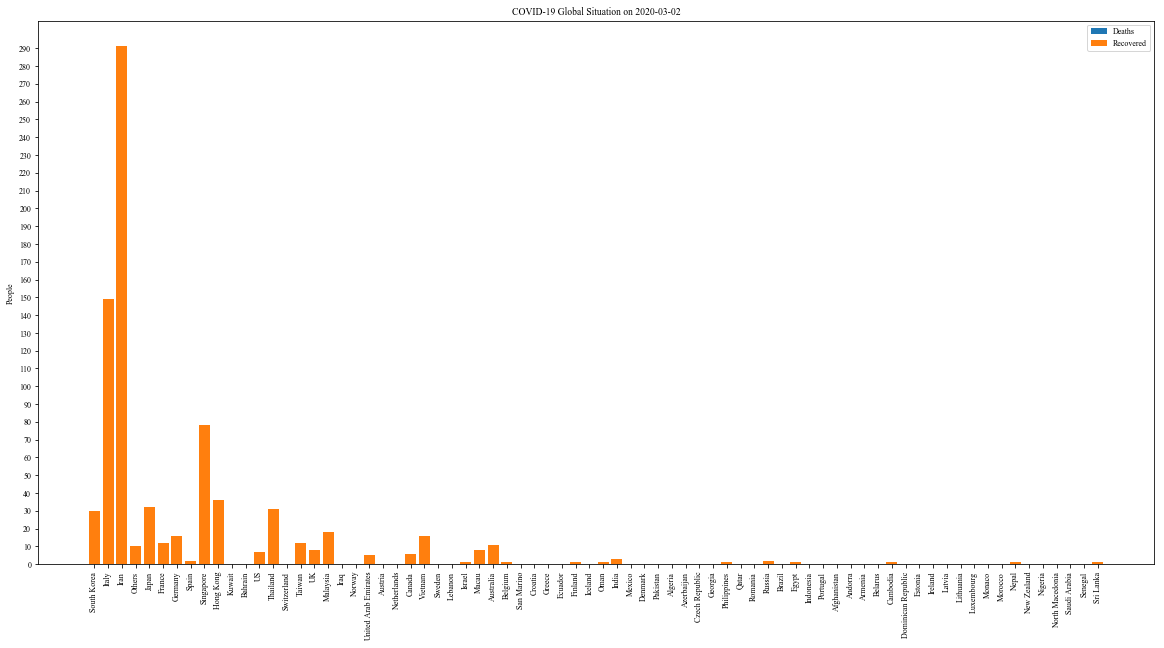

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
temp_df = agg_df.drop('Mainland China')
#Confirmed = temp_df['Confirmed']
Deaths = temp_df['Deaths']
Recovered = temp_df['Recovered']
ind = temp_df.index
width = 0.8
#p_Confirmed = plt.bar(ind, Confirmed, width)
p_Deaths = plt.bar(ind, Deaths, width)
p_Recovered = plt.bar(ind, Recovered, width)
plt.ylabel('People')
plt.title('COVID-19 Global Situation on '+d)
plt.xticks(ind, rotation=90)
plt.yticks(np.arange(0, np.max(temp_df['Recovered']), 10))
#plt.legend((p_Confirmed[0], p_Deaths[0], p_Recovered[0]), ('Confirmed', 'Deaths', 'Recovered'))
plt.legend((p_Deaths[0], p_Recovered[0]), ('Deaths', 'Recovered'))
plt.show()

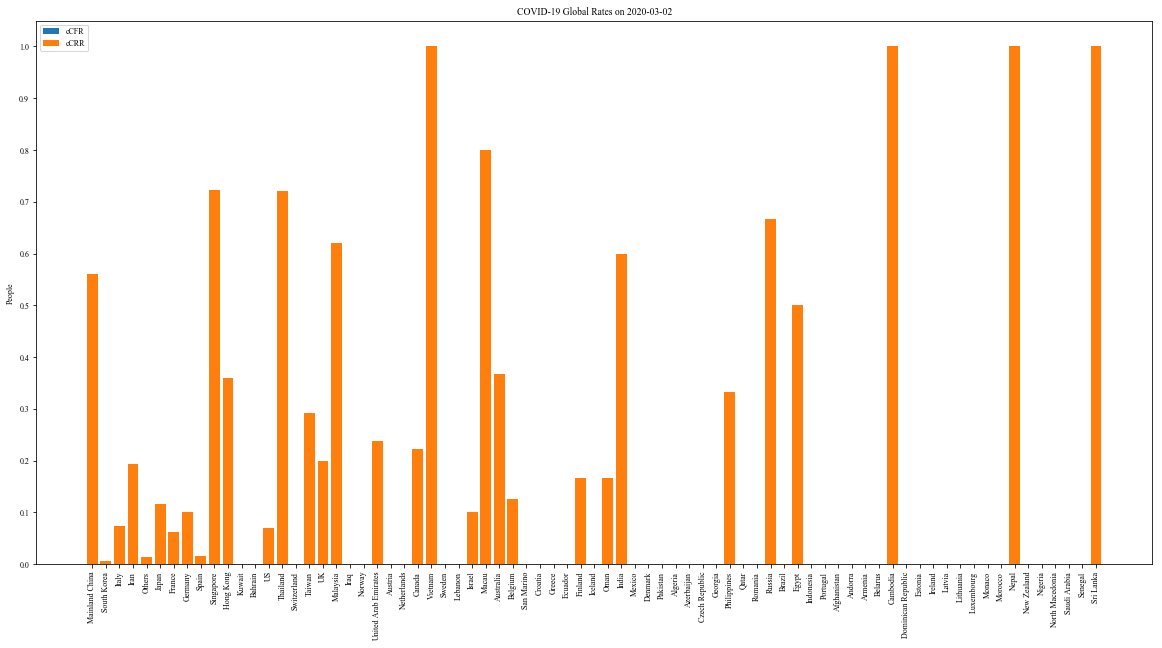

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
agg_df['cCFR'] = agg_df['Deaths']/agg_df['Confirmed']
agg_df['cCRR'] = agg_df['Recovered']/agg_df['Confirmed']
dr = agg_df['cCFR']
rr = agg_df['cCRR']
ind = agg_df.index
width = 0.8
p_dr = plt.bar(ind, dr, width)
p_rr = plt.bar(ind, rr, width)
plt.ylabel('People')
plt.title('COVID-19 Global Rates on '+d)
plt.xticks(ind, rotation=90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p_dr[0], p_rr[0]), ('cCFR', 'cCRR'))
plt.show()

In [288]:
agg_df['cCFR Lower 95% CI Bound'] = agg_df['cCFR']-1.96*np.sqrt(agg_df['cCFR']*(1-agg_df['cCFR'])/agg_df['Confirmed'])
agg_df['cCFR Upper 95% CI Bound'] = agg_df['cCFR']+1.96*np.sqrt(agg_df['cCFR']*(1-agg_df['cCFR'])/agg_df['Confirmed'])
agg_df['cCRR Lower 95% CI Bound'] = agg_df['cCRR']-1.96*np.sqrt(agg_df['cCRR']*(1-agg_df['cCRR'])/agg_df['Confirmed'])
agg_df['cCRR Upper 95% CI Bound'] = agg_df['cCRR']+1.96*np.sqrt(agg_df['cCRR']*(1-agg_df['cCRR'])/agg_df['Confirmed'])
agg_df.where(agg_df > 0, 0, inplace = True)

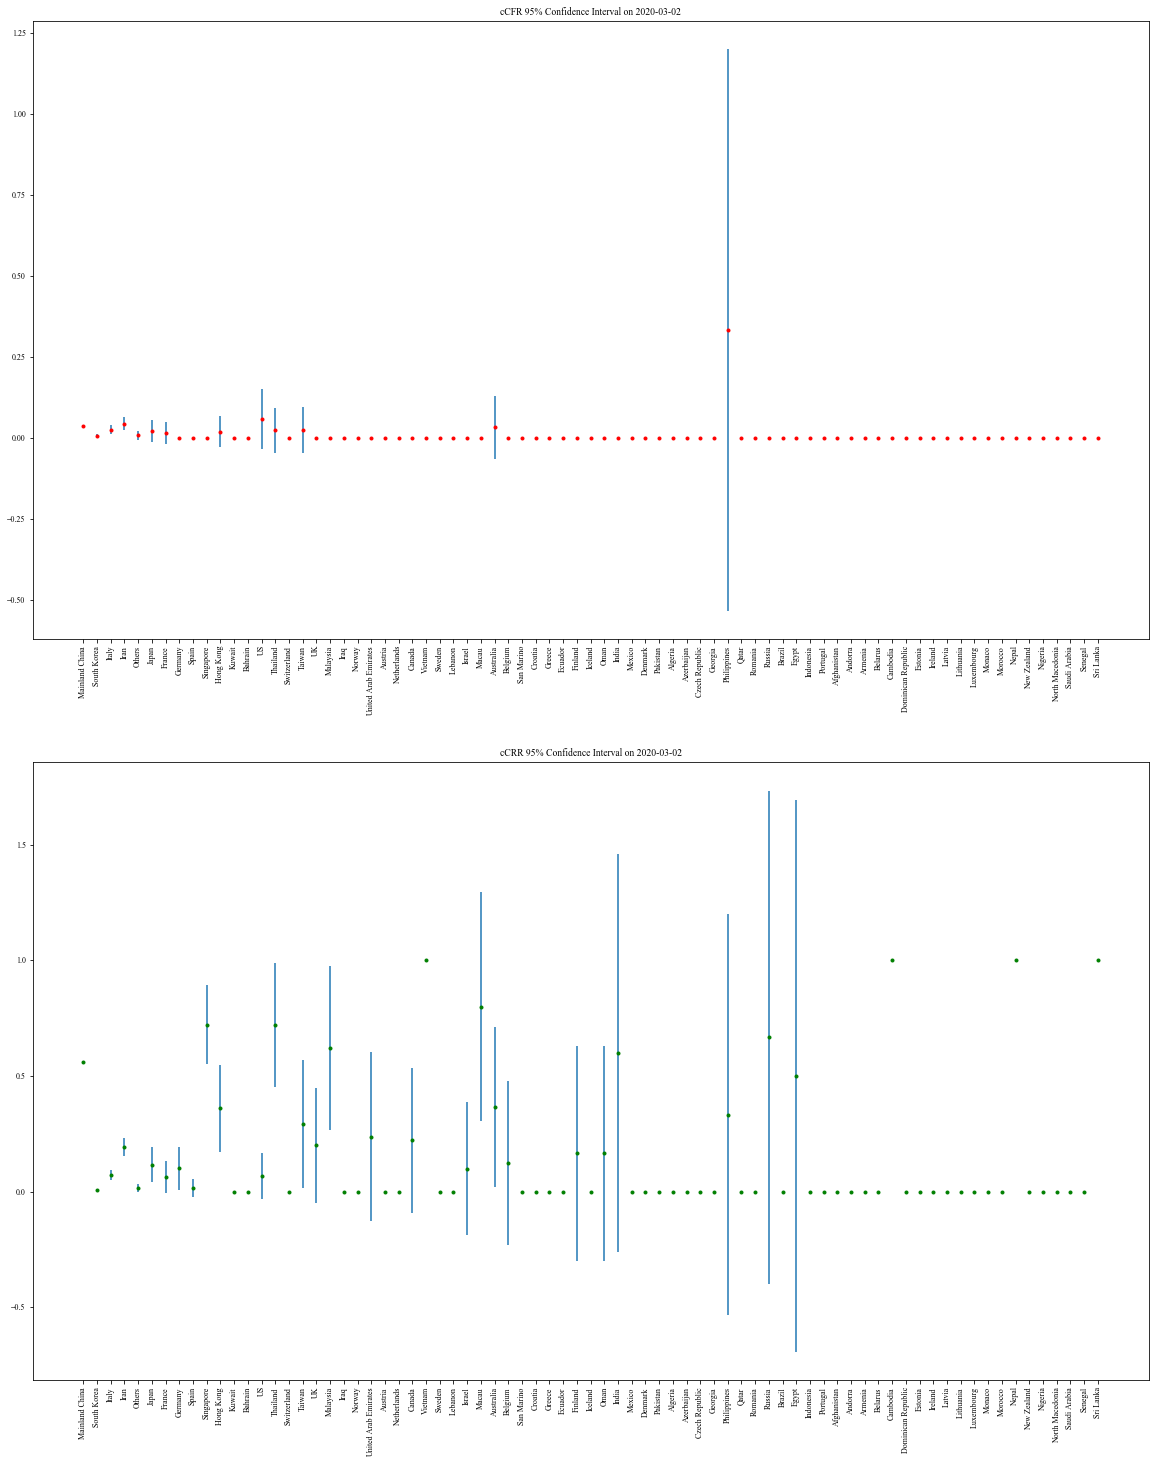

In [289]:
x = agg_df.index
fig, ax = plt.subplots(2, 1, figsize=(20, 25))
ls = 'None'
yd = agg_df['cCFR']
errd = agg_df['cCFR Upper 95% CI Bound'] - agg_df['cCFR Lower 95% CI Bound']
ax[0].plot(agg_df.index, agg_df['cCFR'], 'r.')
ax[0].errorbar(x, yd, yerr=errd, linestyle=ls)
ax[0].set_title('cCFR 95% Confidence Interval on '+d)
ax[0].set_xticklabels(x, rotation=90)

yr = agg_df['cCRR']
errr = agg_df['cCRR Upper 95% CI Bound'] - agg_df['cCRR Lower 95% CI Bound']
ax[1].plot(agg_df.index, agg_df['cCRR'], 'g.')
ax[1].errorbar(x, yr, yerr=errr, linestyle=ls)
ax[1].set_title('cCRR 95% Confidence Interval on '+d)
ax[1].set_xticklabels(x, rotation=90)
#plt.savefig('e:/CI'+d+'.png')

plt.show()

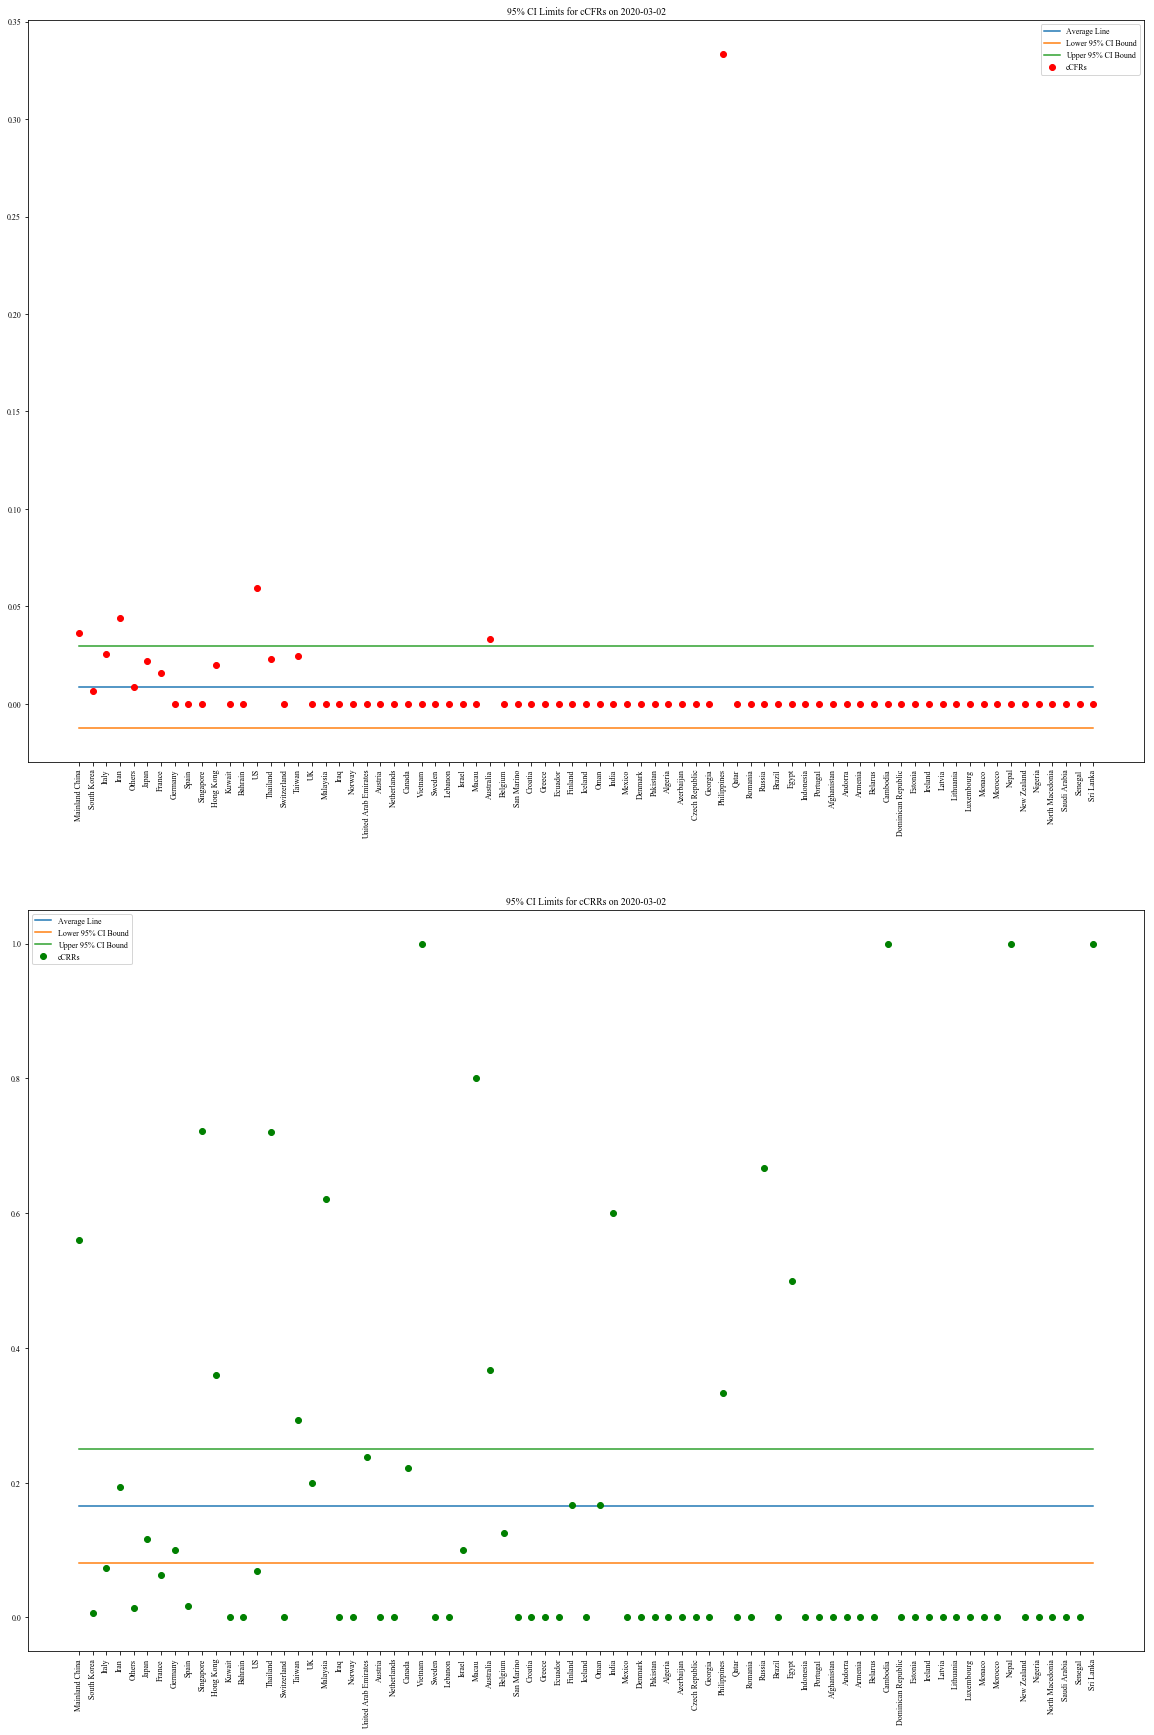

In [290]:
fig, ax =  plt.subplots(2, 1, figsize=(20, 30))
ind = agg_df.index

dr_average = agg_df['cCFR'].mean()
num = agg_df['cCFR'].count()
rcl = np.ones(num)*dr_average
rucl = np.ones(num)*(dr_average + 1.96*np.sqrt(dr_average*(1-dr_average)/num))
rlcl = np.ones(num)*(dr_average - 1.96*np.sqrt(dr_average*(1-dr_average)/num))
dr = agg_df['cCFR']
p_rcl = ax[0].plot(x, rcl)
p_rlcl = ax[0].plot(x, rlcl)
p_rucl = ax[0].plot(x, rucl)
p_dr = ax[0].plot(x, dr, 'ro')
ax[0].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_dr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'cCFRs'))
ax[0].set_title('95% CI Limits for cCFRs on '+d)
ax[0].set_xticklabels(ind, rotation=90)

rr_average = agg_df['cCRR'].mean()
num = agg_df['cCRR'].count()
rcl = np.ones(num)*rr_average
rucl = np.ones(num)*(rr_average + 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rlcl = np.ones(num)*(rr_average - 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rr = agg_df['cCRR']
p_rcl = ax[1].plot(x, rcl)
p_rlcl = ax[1].plot(x, rlcl)
p_rucl = ax[1].plot(x, rucl)
p_rr = ax[1].plot(x, rr, 'go')
ax[1].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_rr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'cCRRs'))
ax[1].set_title('95% CI Limits for cCRRs on '+d)
ax[1].set_xticklabels(ind, rotation=90)
#plt.savefig('e:/CL'+d+'.png')

plt.show()

In [291]:
high_dr_df = agg_df.where(agg_df['cCFR'] > dr_average + 1.96*np.sqrt(dr_average*(1-dr_average)/num)).dropna()
high_rr_df = agg_df.where(agg_df['cCRR'] > rr_average + 1.96*np.sqrt(rr_average*(1-rr_average)/num)).dropna()
low_dr_df = agg_df.where(agg_df['cCFR'] == 0).dropna()
low_rr_df = agg_df.where(agg_df['cCRR'] < rr_average - 1.96*np.sqrt(rr_average*(1-rr_average)/num)).dropna()

In [292]:
high_dr_df

,Confirmed,Deaths,Recovered,cCFR,cCRR,cCFR Lower 95% CI Bound,cCFR Upper 95% CI Bound,cCRR Lower 95% CI Bound,cCRR Upper 95% CI Bound
Country/Region,,,,,,,,,
Mainland China,80026.0,2912.0,44810.0,0.036388,0.559943,0.035091,0.037686,0.556504,0.563382
Iran,1501.0,66.0,291.0,0.043971,0.193871,0.033598,0.054343,0.173871,0.213870
US,101.0,6.0,7.0,0.059406,0.069307,0.013305,0.105507,0.019775,0.118839
Australia,30.0,1.0,11.0,0.033333,0.366667,0.000000,0.097569,0.194223,0.539110
Philippines,3.0,1.0,1.0,0.333333,0.333333,0.000000,0.866778,0.000000,0.866778


In [293]:
low_dr_df

,Confirmed,Deaths,Recovered,cCFR,cCRR,cCFR Lower 95% CI Bound,cCFR Upper 95% CI Bound,cCRR Lower 95% CI Bound,cCRR Upper 95% CI Bound
Country/Region,,,,,,,,,
Germany,159.0,0.0,16.0,0.0,0.100629,0.0,0.0,0.053867,0.147390
Spain,120.0,0.0,2.0,0.0,0.016667,0.0,0.0,0.000000,0.039572
Singapore,108.0,0.0,78.0,0.0,0.722222,0.0,0.0,0.637747,0.806697
Kuwait,56.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Bahrain,49.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
Switzerland,42.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
UK,40.0,0.0,8.0,0.0,0.200000,0.0,0.0,0.076039,0.323961
Malaysia,29.0,0.0,18.0,0.0,0.620690,0.0,0.0,0.444089,0.797290
Iraq,26.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [294]:
high_rr_df

,Confirmed,Deaths,Recovered,cCFR,cCRR,cCFR Lower 95% CI Bound,cCFR Upper 95% CI Bound,cCRR Lower 95% CI Bound,cCRR Upper 95% CI Bound
Country/Region,,,,,,,,,
Mainland China,80026.0,2912.0,44810.0,0.036388,0.559943,0.035091,0.037686,0.556504,0.563382
Singapore,108.0,0.0,78.0,0.000000,0.722222,0.000000,0.000000,0.637747,0.806697
Hong Kong,100.0,2.0,36.0,0.020000,0.360000,0.000000,0.047440,0.265920,0.454080
Thailand,43.0,1.0,31.0,0.023256,0.720930,0.000000,0.068304,0.586862,0.854998
Taiwan,41.0,1.0,12.0,0.024390,0.292683,0.000000,0.071609,0.153409,0.431957
Malaysia,29.0,0.0,18.0,0.000000,0.620690,0.000000,0.000000,0.444089,0.797290
Vietnam,16.0,0.0,16.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
Macau,10.0,0.0,8.0,0.000000,0.800000,0.000000,0.000000,0.552077,1.047923
Australia,30.0,1.0,11.0,0.033333,0.366667,0.000000,0.097569,0.194223,0.539110


In [295]:
low_rr_df

,Confirmed,Deaths,Recovered,cCFR,cCRR,cCFR Lower 95% CI Bound,cCFR Upper 95% CI Bound,cCRR Lower 95% CI Bound,cCRR Upper 95% CI Bound
Country/Region,,,,,,,,,
South Korea,4335.0,28.0,30.0,0.006459,0.006920,0.004074,0.008844,0.004453,0.009388
Italy,2036.0,52.0,149.0,0.025540,0.073183,0.018688,0.032393,0.061870,0.084495
Others,705.0,6.0,10.0,0.008511,0.014184,0.001730,0.015292,0.005455,0.022913
France,191.0,3.0,12.0,0.015707,0.062827,0.000000,0.033341,0.028414,0.097240
Spain,120.0,0.0,2.0,0.000000,0.016667,0.000000,0.000000,0.000000,0.039572
Kuwait,56.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bahrain,49.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
US,101.0,6.0,7.0,0.059406,0.069307,0.013305,0.105507,0.019775,0.118839
Switzerland,42.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [296]:
warn_df = low_rr_df.merge(high_dr_df, left_index=True, right_index = True)
warn_df

,Confirmed_x,Deaths_x,Recovered_x,cCFR_x,cCRR_x,cCFR Lower 95% CI Bound_x,cCFR Upper 95% CI Bound_x,cCRR Lower 95% CI Bound_x,cCRR Upper 95% CI Bound_x,Confirmed_y,Deaths_y,Recovered_y,cCFR_y,cCRR_y,cCFR Lower 95% CI Bound_y,cCFR Upper 95% CI Bound_y,cCRR Lower 95% CI Bound_y,cCRR Upper 95% CI Bound_y
Country/Region,,,,,,,,,,,,,,,,,,
US,101.0,6.0,7.0,0.059406,0.069307,0.013305,0.105507,0.019775,0.118839,101.0,6.0,7.0,0.059406,0.069307,0.013305,0.105507,0.019775,0.118839


In [297]:
good_df = high_rr_df.merge(low_dr_df, left_index=True, right_index = True)
good_df

,Confirmed_x,Deaths_x,Recovered_x,cCFR_x,cCRR_x,cCFR Lower 95% CI Bound_x,cCFR Upper 95% CI Bound_x,cCRR Lower 95% CI Bound_x,cCRR Upper 95% CI Bound_x,Confirmed_y,Deaths_y,Recovered_y,cCFR_y,cCRR_y,cCFR Lower 95% CI Bound_y,cCFR Upper 95% CI Bound_y,cCRR Lower 95% CI Bound_y,cCRR Upper 95% CI Bound_y
Country/Region,,,,,,,,,,,,,,,,,,
Singapore,108.0,0.0,78.0,0.0,0.722222,0.0,0.0,0.637747,0.806697,108.0,0.0,78.0,0.0,0.722222,0.0,0.0,0.637747,0.806697
Malaysia,29.0,0.0,18.0,0.0,0.620690,0.0,0.0,0.444089,0.797290,29.0,0.0,18.0,0.0,0.620690,0.0,0.0,0.444089,0.797290
Vietnam,16.0,0.0,16.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,16.0,0.0,16.0,0.0,1.000000,0.0,0.0,1.000000,1.000000
Macau,10.0,0.0,8.0,0.0,0.800000,0.0,0.0,0.552077,1.047923,10.0,0.0,8.0,0.0,0.800000,0.0,0.0,0.552077,1.047923
India,5.0,0.0,3.0,0.0,0.600000,0.0,0.0,0.170586,1.029414,5.0,0.0,3.0,0.0,0.600000,0.0,0.0,0.170586,1.029414
Russia,3.0,0.0,2.0,0.0,0.666667,0.0,0.0,0.133222,1.200111,3.0,0.0,2.0,0.0,0.666667,0.0,0.0,0.133222,1.200111
Egypt,2.0,0.0,1.0,0.0,0.500000,0.0,0.0,0.000000,1.192965,2.0,0.0,1.0,0.0,0.500000,0.0,0.0,0.000000,1.192965
Cambodia,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000
Nepal,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


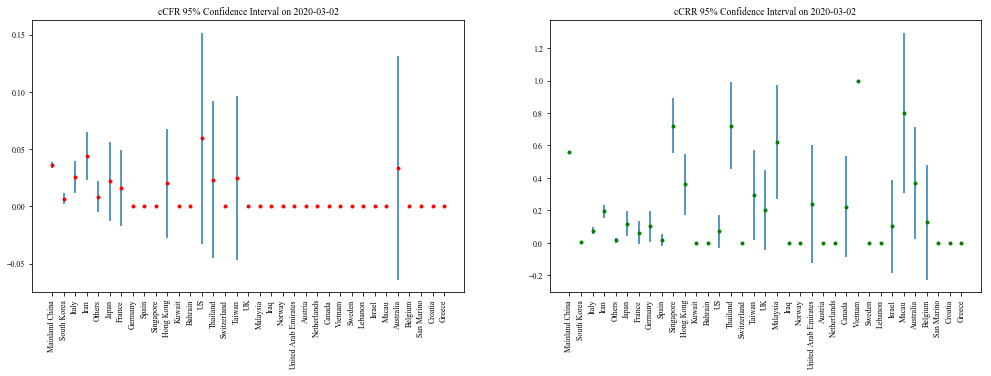

In [298]:
head_df = agg_df.head(35)
x = head_df.index
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ls = 'None'
yd = head_df['cCFR']
errd = head_df['cCFR Upper 95% CI Bound'] - head_df['cCFR Lower 95% CI Bound']
ax[0].plot(head_df.index, head_df['cCFR'], 'r.')
ax[0].errorbar(x, yd, yerr=errd, linestyle=ls)
ax[0].set_title('cCFR 95% Confidence Interval on '+d)
ax[0].set_xticklabels(x, rotation=90)

yr = head_df['cCRR']
errr = head_df['cCRR Upper 95% CI Bound'] - head_df['cCRR Lower 95% CI Bound']
ax[1].plot(head_df.index, head_df['cCRR'], 'g.')
ax[1].errorbar(x, yr, yerr=errr, linestyle=ls)
ax[1].set_title('cCRR 95% Confidence Interval on '+d)
ax[1].set_xticklabels(x, rotation=90)
#plt.savefig('e:/CI'+d+'.png')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

plt.show()

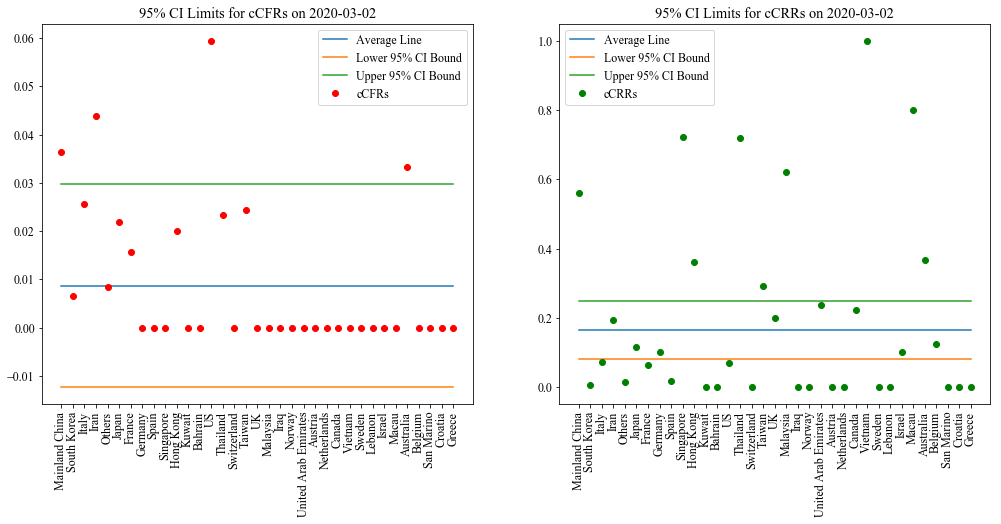

In [299]:
head_df = agg_df.head(35)
fig, ax = plt.subplots(1, 2, figsize=(17, 7))
ind = head_df.index

dr_average = agg_df['cCFR'].mean()
num = agg_df['cCFR'].count()
rcl = np.ones(num)*dr_average
rucl = np.ones(num)*(dr_average + 1.96*np.sqrt(dr_average*(1-dr_average)/num))
rlcl = np.ones(num)*(dr_average - 1.96*np.sqrt(dr_average*(1-dr_average)/num))
dr = head_df['cCFR']
p_rcl = ax[0].plot(x, rcl[0:35])
p_rlcl = ax[0].plot(x, rlcl[0:35])
p_rucl = ax[0].plot(x, rucl[0:35])
p_dr = ax[0].plot(x, dr, 'ro')
ax[0].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_dr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'cCFRs'))
ax[0].set_title('95% CI Limits for cCFRs on '+d)
ax[0].set_xticklabels(ind, rotation=90)

rr_average = agg_df['cCRR'].mean()
num = agg_df['cCRR'].count()
rcl = np.ones(num)*rr_average
rucl = np.ones(num)*(rr_average + 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rlcl = np.ones(num)*(rr_average - 1.96*np.sqrt(rr_average*(1-rr_average)/num))
rr = head_df['cCRR']
p_rcl = ax[1].plot(x, rcl[0:35])
p_rlcl = ax[1].plot(x, rlcl[0:35])
p_rucl = ax[1].plot(x, rucl[0:35])
p_rr = ax[1].plot(x, rr, 'go')
ax[1].legend((p_rcl[0], p_rlcl[0], p_rucl[0], p_rr[0]), ('Average Line', 'Lower 95% CI Bound', 'Upper 95% CI Bound', 'cCRRs'))
ax[1].set_title('95% CI Limits for cCRRs on '+d)
ax[1].set_xticklabels(ind, rotation=90)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8
#plt.savefig('e:/CL'+d+'.png')

plt.show()